In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from BaselineRemoval import BaselineRemoval
from sklearn.preprocessing import MinMaxScaler, StandardScaler


import sys
from sklearn.preprocessing import MinMaxScaler, StandardScaler



## 1. ETL

In [2]:
from src import spectrumloader as spl

In [3]:
PLT = 'dataset/' ## change to the path to dataset
standard,data_all = spl.read_file(PLT)

In [4]:
Xs,ys,_ = spl.cut_tonumpy(data_all)

In [5]:
assert len(Xs) == 4, 'DATA error'

## 2.Train test split (with same seed)

In [6]:
X_trainall,_,y_trainall,_ = spl.split_train_test(Xs,ys)
y_train0,y_train1,y_train2,y_train3 = y_trainall

## 3. EDA [here](https://github.com/AtiChetsurakul/DataScienceAndMLProjects/blob/main/Diabete_detection_withRamanSpec/datawatcher.ipynb)
- To shorten the file, eda not inculded

## 4. spectrum tranformation 
- incuding
    - Fluoresence removal
    - Correcting baseline
    - Normalization

In [7]:
X_train_VR = spl.fluoresence_removal(X_trainall)

In [8]:
X_train0_std,X_train1_std,X_train2_std,X_train3_std,normalizer = spl.seting_normalized_fuoresence_smoothing(True,True,X_train_VR)

assert len(normalizer) == 4, 'Normalizer is not here'

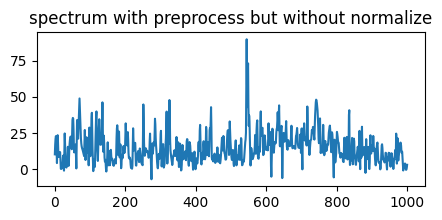

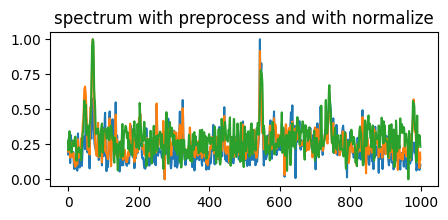

In [9]:
# Check by plot
plt.figure(figsize=(5,2))
plt.plot(X_train_VR[0][0])
plt.title('spectrum with preprocess but without normalize')
plt.show()
plt.figure(figsize=(5,2))
plt.title('spectrum with preprocess and with normalize')
plt.plot(X_train0_std[0])
plt.plot(X_train0_std[7])
plt.plot(X_train0_std[-1])

plt.show()

In [10]:
'''
 from sklearn.model_selection import train_test_split

# # Split dataset into training set and test set
X_train_ear, X_val_ear, y_train_ear,y_val_ear = train_test_split(X_train0_std, y_train0, test_size=0.2,random_state=109) # 70% training and 30% test
X_train_arm, X_val_arm, y_train_arm, y_val_arm = train_test_split(X_train1_std, y_train1, test_size=0.2,random_state=109) # 70% training and 30% test
X_train_nail,X_val_nail, y_train_nail, y_val_nail= train_test_split(X_train2_std, y_train2, test_size=0.2,random_state=109) # 70% training and 30% test
X_train_vein, X_val_vein, y_train_vein, y_val_vein = train_test_split(X_train3_std, y_train3, test_size=0.2,random_state=109) # 70% training and 30% test
'''

'\n from sklearn.model_selection import train_test_split\n\n# # Split dataset into training set and test set\nX_train_ear, X_val_ear, y_train_ear,y_val_ear = train_test_split(X_train0_std, y_train0, test_size=0.2,random_state=109) # 70% training and 30% test\nX_train_arm, X_val_arm, y_train_arm, y_val_arm = train_test_split(X_train1_std, y_train1, test_size=0.2,random_state=109) # 70% training and 30% test\nX_train_nail,X_val_nail, y_train_nail, y_val_nail= train_test_split(X_train2_std, y_train2, test_size=0.2,random_state=109) # 70% training and 30% test\nX_train_vein, X_val_vein, y_train_vein, y_val_vein = train_test_split(X_train3_std, y_train3, test_size=0.2,random_state=109) # 70% training and 30% test\n'

In [12]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear',C=10,gamma=0.7)  # Linear Kernel
clf1=svm.SVC(kernel='rbf',C=10,gamma=0.7)
clf2=svm.SVC(kernel='poly',C=10,gamma=0.7)
print('EAR lobe cross valaidation score')

scoresclf = cross_val_score(clf, X_train0_std, y_train0, cv=5)
print("Linear kernel",scoresclf)

scoresclf = cross_val_score(clf1, X_train0_std, y_train0, cv=5)
print("RBF kernel",scoresclf)

scoresclf = cross_val_score(clf2, X_train0_std, y_train0, cv=5)
print("Polynomial kernel",scoresclf)


EAR lobe cross valaidation score
Linear kernel [0.5        0.66666667 0.33333333 0.66666667 0.66666667]
RBF kernel [0.25       0.         0.33333333 0.33333333 0.33333333]
Polynomial kernel [0.5        0.66666667 0.66666667 0.66666667 0.66666667]


In [13]:
print('Inner Arm cross validation score')

clf = svm.SVC(kernel='linear',C=10,gamma=0.7)  # Linear Kernel
clf1=svm.SVC(kernel='rbf',C=10,gamma=0.7)
clf2=svm.SVC(kernel='poly',C=10,gamma=0.7)

scoresclf1 = cross_val_score(clf, X_train1_std, y_train1, cv=5)
print("Linear kernel",scoresclf1)


scoresclf1 = cross_val_score(clf1, X_train1_std, y_train1, cv=5)
print("RBF kernel",scoresclf1)


scoresclf1 = cross_val_score(clf2, X_train1_std, y_train1, cv=5)
print("Polynomial kernel",scoresclf1)


Inner Arm cross validation score
Linear kernel [0.5        0.33333333 1.         0.66666667 0.33333333]
RBF kernel [0.5        0.33333333 0.33333333 0.33333333 0.33333333]
Polynomial kernel [0.25       0.66666667 0.66666667 0.66666667 0.33333333]


In [14]:
print('thumbnail cross validation score')

clf = svm.SVC(kernel='linear',C=10,gamma=0.7)  # Linear Kernel
clf1=svm.SVC(kernel='rbf',C=10,gamma=0.7)
clf2=svm.SVC(kernel='poly',C=10,gamma=0.7)

scoresclf2= cross_val_score(clf, X_train2_std, y_train2, cv=5)
print("Linear kernel",scoresclf2)


scoresclf2= cross_val_score(clf1, X_train2_std, y_train2, cv=5)
print("RBF kernel",scoresclf2)

scoresclf2= cross_val_score(clf2, X_train2_std, y_train2, cv=5)
print("Polynomial kernel",scoresclf2)




thumbnail cross validation score
Linear kernel [0.5        0.66666667 0.66666667 0.33333333 1.        ]
RBF kernel [0.25       0.33333333 0.66666667 0.33333333 1.        ]
Polynomial kernel [0.25       0.66666667 0.66666667 0.33333333 1.        ]


In [15]:
print('Vein cross validation score')

clf = svm.SVC(kernel='linear',C=10,gamma=0.7)  # Linear Kernel
clf1=svm.SVC(kernel='rbf',C=10,gamma=0.7)
clf2=svm.SVC(kernel='poly',C=10,gamma=0.7)

scoresclf3=cross_val_score(clf, X_train3_std, y_train3, cv=5)
print("Linear kernel",scoresclf3)


scoresclf3=cross_val_score(clf1, X_train3_std, y_train3, cv=5)
print("RBF kernel",scoresclf3)


scoresclf3=cross_val_score(clf2, X_train3_std, y_train3, cv=5)
print("Polynomial kernel",scoresclf3)

Vein cross validation score
Linear kernel [0.5        0.33333333 1.         0.33333333 0.66666667]
RBF kernel [0.75       0.33333333 0.33333333 0.33333333 0.33333333]
Polynomial kernel [0.5        0.33333333 1.         0.33333333 0.33333333]


In [16]:
from sklearn import svm

#Create a svm  linear Classifier
clf = svm.SVC(kernel='linear',C=10,gamma=0.7) # Linear Kernel

#Train the model using the training sets
model_ear=clf.fit(X_train0_std, y_train0)
model_arm=clf.fit(X_train1_std, y_train1)
model_nail=clf.fit(X_train2_std, y_train2)
model_vein=clf.fit(X_train3_std, y_train3)


In [17]:
earlobe_score=model_ear.score(X_train0_std,y_train0)
print("EarLobe mean accuaracy score",earlobe_score)

innerArm_score=model_arm.score(X_train1_std,y_train1)
print("Inner arm mean accuaracy score",innerArm_score)

thumbNail_score=model_nail.score(X_train2_std,y_train2)
print("Thumbnail mean accuaracy score",thumbNail_score)

vein_score=model_nail.score(X_train3_std,y_train3)
print("Vein mean accuaracy score",vein_score)


EarLobe mean accuaracy score 0.5
Inner arm mean accuaracy score 0.875
Thumbnail mean accuaracy score 0.5
Vein mean accuaracy score 1.0


In [20]:
X_trainall,X_testall,y_trainall,y_testall = spl.split_train_test(Xs,ys)
y_train0,y_train1,y_train2,y_train3 = y_trainall

In [21]:
SMOOTH=False

In [22]:
X_test_VR = spl.fluoresence_removal(X_testall)
if SMOOTH:
    X_test_VR = spl.savitzky_smooth(X_test_VR)

In [23]:



X_test0_std,X_test1_std,X_test2_std,X_test3_std,normalizer2 = spl.seting_normalized_fuoresence_smoothing(True,True,X_test_VR)


assert len(normalizer2) == 4, 'Normalizer is not here'

In [24]:
y_test0,y_test1,y_test2,y_test3 = y_testall

In [25]:
y_pred_ear = clf.predict(X_test0_std)
y_pred_arm= clf.predict(X_test1_std)
y_pred_nail= clf.predict(X_test2_std)
y_pred_vein= clf.predict(X_test3_std)

In [26]:
earlobe_score=model_ear.score(X_test0_std,y_test0)
print("EarLobe mean accuaracy score",earlobe_score)

innerArm_score=model_arm.score(X_test1_std,y_test1)
print("Inner arm mean accuaracy score",innerArm_score)

thumbNail_score=model_nail.score(X_test2_std,y_test2)
print("Thumbnail mean accuaracy score",thumbNail_score)

vein_score=model_nail.score(X_test3_std,y_test3)
print("Vein mean accuaracy score",vein_score)


EarLobe mean accuaracy score 0.75
Inner arm mean accuaracy score 0.75
Thumbnail mean accuaracy score 0.75
Vein mean accuaracy score 0.75


In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
#Earlobe_score
Accuracy_Score = accuracy_score(y_test0, y_pred_ear)
Precision_Score = precision_score(y_test0, y_pred_ear,  average="macro")
Recall_Score = recall_score(y_test0, y_pred_ear,  average="macro")
F1_Score = f1_score(y_test0, y_pred_ear,  average="macro")

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Average Precision: %0.2f +/- (%0.1f) %%' % (Precision_Score.mean()*100, Precision_Score.std()*100))
print('Average Recall: %0.2f +/- (%0.1f) %%' % (Recall_Score.mean()*100, Recall_Score.std()*100))
print('Average F1-Score: %0.2f +/- (%0.1f) %%' % (F1_Score.mean()*100, F1_Score.std()*100))


Average Accuracy: 75.00 +/- (0.0) %
Average Precision: 37.50 +/- (0.0) %
Average Recall: 50.00 +/- (0.0) %
Average F1-Score: 42.86 +/- (0.0) %


In [55]:
#Confusion matrix for ear lobe
CM1 = confusion_matrix(y_test0, y_pred_ear)
CM1

array([[0, 1],
       [0, 3]], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
#Inner Arm score
Accuracy_Score = accuracy_score(y_test1, y_pred_arm)
Precision_Score = precision_score(y_test1, y_pred_arm,  average="macro")
Recall_Score = recall_score(y_test1, y_pred_arm,  average="macro")
F1_Score = f1_score(y_test1, y_pred_arm,  average="macro")

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Average Precision: %0.2f +/- (%0.1f) %%' % (Precision_Score.mean()*100, Precision_Score.std()*100))
print('Average Recall: %0.2f +/- (%0.1f) %%' % (Recall_Score.mean()*100, Recall_Score.std()*100))
print('Average F1-Score: %0.2f +/- (%0.1f) %%' % (F1_Score.mean()*100, F1_Score.std()*100))

Average Accuracy: 75.00 +/- (0.0) %
Average Precision: 75.00 +/- (0.0) %
Average Recall: 83.33 +/- (0.0) %
Average F1-Score: 73.33 +/- (0.0) %


In [54]:
#Confusion matrix for inner arm
CM2=confusion_matrix(y_test1, y_pred_arm)
CM2

array([[1, 0],
       [1, 2]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
#Thumb Nail score
Accuracy_Score = accuracy_score(y_test2, y_pred_nail)
Precision_Score = precision_score(y_test2, y_pred_nail,  average="macro")
Recall_Score = recall_score(y_test2, y_pred_nail,  average="macro")
F1_Score = f1_score(y_test2, y_pred_nail,  average="macro")

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Average Precision: %0.2f +/- (%0.1f) %%' % (Precision_Score.mean()*100, Precision_Score.std()*100))
print('Average Recall: %0.2f +/- (%0.1f) %%' % (Recall_Score.mean()*100, Recall_Score.std()*100))
print('Average F1-Score: %0.2f +/- (%0.1f) %%' % (F1_Score.mean()*100, F1_Score.std()*100))

Average Accuracy: 75.00 +/- (0.0) %
Average Precision: 37.50 +/- (0.0) %
Average Recall: 50.00 +/- (0.0) %
Average F1-Score: 42.86 +/- (0.0) %


In [52]:
#Confusion matrix for thumb nail
CM3=confusion_matrix(y_test2, y_pred_nail)
CM3

array([[0, 1],
       [0, 3]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
#Vein score
Accuracy_Score = accuracy_score(y_test3, y_pred_vein)
Precision_Score = precision_score(y_test3, y_pred_vein,  average="macro")
Recall_Score = recall_score(y_test3, y_pred_vein,  average="macro")
F1_Score = f1_score(y_test3, y_pred_vein,  average="macro")

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Average Precision: %0.2f +/- (%0.1f) %%' % (Precision_Score.mean()*100, Precision_Score.std()*100))
print('Average Recall: %0.2f +/- (%0.1f) %%' % (Recall_Score.mean()*100, Recall_Score.std()*100))
print('Average F1-Score: %0.2f +/- (%0.1f) %%' % (F1_Score.mean()*100, F1_Score.std()*100))

Average Accuracy: 75.00 +/- (0.0) %
Average Precision: 75.00 +/- (0.0) %
Average Recall: 83.33 +/- (0.0) %
Average F1-Score: 73.33 +/- (0.0) %


In [53]:
#Confusion matrix for Vein
CM4=confusion_matrix(y_test3, y_pred_vein)
CM4

array([[1, 0],
       [1, 2]], dtype=int64)